# House Price Prediction
### Kaggle: House Prices - Advanced Regression Techniques
#### Kaggle Team name: LSR-NJIT-CS675
#### Team members: Lionel Alliaj, Shwetha Kothagadi, Rahul Gautham Putcha

### Getting familiar with Kaggle competition: House Prices - Advanced Regression Technique
This notebook presents on my teams approach to solve the problem of House Price prediction. The dataset is taken from Kaggle competition and predicts the sale price of a house, given set of features describing the house. A brief description taken from Kaggle is provided below:

### Problem Description:
This problem deals with set of features (variables) that describes the dream house pictured by a home buyer. There are 79 explanatory variables describing almost every aspect of residential homes. The goal is to predict the final sales price of each home.

For more description,
The project description can be found at [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)

- Also we are given the following set of data items:
<img src='./images/Data_Description.png' />

<strong>Note: All of the above items are downloaded and stored in the <u>./datasets</u> directory within the Project folder.</strong>


Given above general description of what we want to achieve in this project, We also are looking to achieve it in a systematic way by doing the following tasks:
- **Data Cleaning and Data Imputing**, for improving the Data quality
- **Feature Selection**: a way to <u>reduce the dimensions</u> of our dataset without loosing relavent data pertaining our target variable. Where we use statistical metrics to select top 10 features.
- **Create 5 New correlated features**: Here we improve our model accuracy by creating new set of variables form our dataset 
- **Training and Testing**: Using 3 ML algorithms chosen based on the problem statement.

#### Import files
- First we import libraries that are commonly required for Data cleaning and Data preprocessing

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

- We read the dataset from the file taken store it in a variable, named dataset.

In [2]:
dataset = pd.read_csv('./datasets/train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can see that the dataset has 81 columns. This is very huge for any of our model to handle and can cause a real problem in training our model. In reference to Dimensionality Reduction, which mentions that having more data is good for a model but at some point this data can decay knowledge gained from training our model and hence, give us an unoptimal or undesired accuracy score.

*As we say too much of something is too bad*. <br/>
*More data would mean more errors are recorded* (from outliers, NaN, unrelated or sometimes misleading too .etc.)
which may be one of many reason why we are supposed to do cleaning before we progress with training the model on raw dataset.

Hence, we go with our first and formost important part of understanding dataset. That is, **The Data cleaning**.

### Data Cleaning
- Our dataset includes all kind of values. All values are explain different feature of an entity in real-world. 
- Among these some of them are really useful feature, some of them are totally unrelated or even not following the others with similar features with respect to a variable that defines goal/purpose of conducting a training, namely **target** (SalePrice).
- In this section, To check existance of such we perform following nessary tasks to accomplish the Data cleaning on our dataset:
  - Check for NaN, and remove features that donot provide sufficient data.
  - Data quality checking: missing Data Imputation, on record that provide sufficient details about the feature.
  
  
#### Check for NaN values
- **Why should we do this?** 
- Because our may also dataset captures features with missing information.
- Hence, the feature with more NaN (or missing/unknown) values explain less about the feature it should describe.
- Therefore, if there are many NaN then its meaningless to keep a record of it while determining the target with our dataset.
- In this case, we find the features that contains missing records which is more than 60% of the total record length.

In [3]:
missing   = dataset.isna().sum().sort_values(ascending=False)
missing[missing>=(0.6*missing.shape[0])]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
dtype: int64

- Now we drop these rows from our dataset.
- So this will our dataset can give better explanation what our individual features in our dataset reflects.

In [4]:
dataset.drop(missing[missing>=(0.6*missing.shape[0])].keys(), axis=1, inplace=True)

For the remaining dataset that are containing with less than 60% NaN values, we will start doing Data Imputing.
#### Data Imputing: For improving Data Quality
- As the title explains why we are doing this process.
- **Why are we not removing these features?**
- Removing these features is not a good idea because most of the records in these features are explaining with less missing data.
- Hence, it provides bare minimum or sufficient data for describing its feature.
- **But including these can cause problems in our dataset? What can we do about it?**
- Its true, therefore there are 2 step to approach this problem, both by means of data imputing:
  1. for Categorical features: use mode() value of records(disregarding NaN) in place of NaN
  2. for Numerical features: use medium() value of records(disregarding NaN) in place of NaN
- In code, we do the following:

In [5]:
impute = missing[missing<(0.6*missing.shape[0])]
impute = impute[0<impute]
dataset[impute.keys()] = dataset[impute.keys()].apply(
    lambda col: (
        # for numerical
        col.fillna(col.median()) 
        if col.dtype == np.float64 #or 
        # for categorical
        else col.fillna(col.mode()[0]) 
    ) 
)

In [6]:
dataset[impute.keys()].isna().sum()

BsmtFinType2    0
BsmtExposure    0
BsmtQual        0
BsmtCond        0
BsmtFinType1    0
MasVnrArea      0
MasVnrType      0
Electrical      0
dtype: int64

We now continue our journey of improving the quality of our dataset by hunting for the records that are useful for us and which are unrelevant to predicting our target, *SalePrice*.

### Add New Features

- Feature 1: Has Basement

In [7]:
new_features = pd.DataFrame()
new_features['HasBsmt'] = pd.Series(len(dataset['TotalBsmtSF']), index = dataset.index)
new_features['HasBsmt'] = 0
new_features.loc[dataset['TotalBsmtSF']>0,'HasBsmt'] = 1

- Feature 2: Has Multiple Floors

In [8]:
new_features['Hasmultifloors'] = pd.Series(len(dataset['2ndFlrSF']), index = dataset.index)
new_features['Hasmultifloors'] = 0
new_features.loc[dataset['2ndFlrSF']>0,'Hasmultifloors'] = 1

- Feature 3: Has Garage

In [9]:
new_features['HasGarage'] = pd.Series(len(dataset['GarageArea']), index = dataset.index)
new_features['HasGarage'] = 0
new_features.loc[dataset['GarageArea']>0,'HasGarage'] = 1

- Feature 4: Has Pool

In [10]:
new_features['HasPool'] = pd.Series(len(dataset['PoolArea']), index = dataset.index)
new_features['HasPool'] = 0
new_features.loc[dataset['PoolArea']>0,'HasPool'] = 1

- Feature 5: Has Misc Features

In [11]:
new_features['HasMiscFeatures'] = pd.Series(len(dataset['MiscVal']), index = dataset.index)
new_features['HasMiscFeatures'] = 0
new_features.loc[dataset['MiscVal']>0,'HasMiscFeatures'] = 1

### Feature Selection process
- Before we delve ourselves into selecting features lets understand what our target variable, a.k.a SalePrice, looks like.

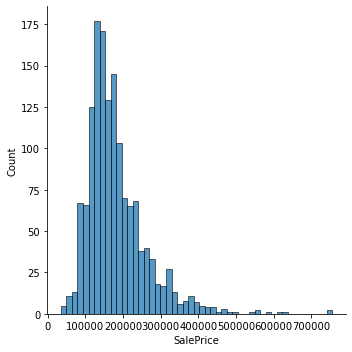

In [12]:
sns.displot(dataset['SalePrice'])

- Our Sales Price is a continuous valued variable.
- Hence, we get to know we are looking at a Regression problem here.

#### Using Correlation
- In this process, we reduce the dimensions by eliminating the unrelated features, cor(feature_i,SalePrice)>0.5, with respect to target.
  
- Below is a heat map that presents a heatmap representing the correlation.

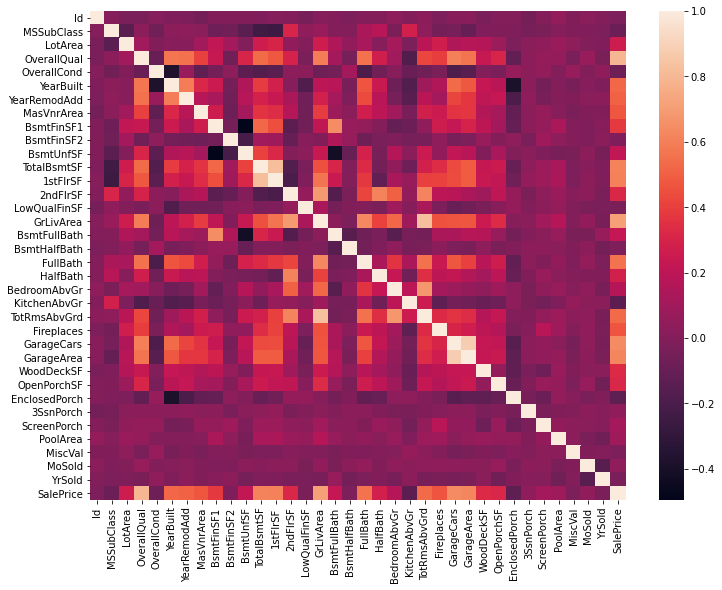

In [13]:
f, ax = plt.subplots(figsize=(12, 9))
cor = dataset.corr()
sns.heatmap(cor);

- Above heatmap depicts correlation, shows the tread pattern on how one increase in time reflected by other.
- **What are we doing on below line of code?**
- We are selecting the features that show correlation (some kind of relation) to our 'SalesPrice' target variables
- We choose top 10 correlated features with respect to 'SalesPrice'. 
- Hence, ignore 0th index as corr('SalesPrice', 'SalesPrice') = 1.0
- Therefore, we choose next 10 highest correlated features.

In [14]:
cor = dataset.corr()
top10_features = cor['SalePrice'].sort_values(ascending=False)[1:11] 
X = dataset[top10_features.keys()]
y = dataset['SalePrice']
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000


### Why are we choosing these features only?
- A correlation is a measure of how closely two features are related.
- This way we can check how many of these features are related to SalePrice, and eliminating the rest.
- Hence, our **top10_features** variable above contains the 10 features that are correlated to the target, SalePrice.

### Normalizing Our Dataset

In [15]:
scaler  = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.keys())
X.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,0.666667,0.259231,0.50,0.386460,0.140098,0.119780,0.666667,0.500000,0.949275,0.883333
1,0.555556,0.174830,0.50,0.324401,0.206547,0.212942,0.666667,0.333333,0.753623,0.433333
2,0.666667,0.273549,0.50,0.428773,0.150573,0.134465,0.666667,0.333333,0.934783,0.866667
3,0.666667,0.260550,0.75,0.452750,0.123732,0.143873,0.333333,0.416667,0.311594,0.333333
4,0.777778,0.351168,0.75,0.589563,0.187398,0.186095,0.666667,0.583333,0.927536,0.833333


#### Visualizing above features w.r.t Target variable

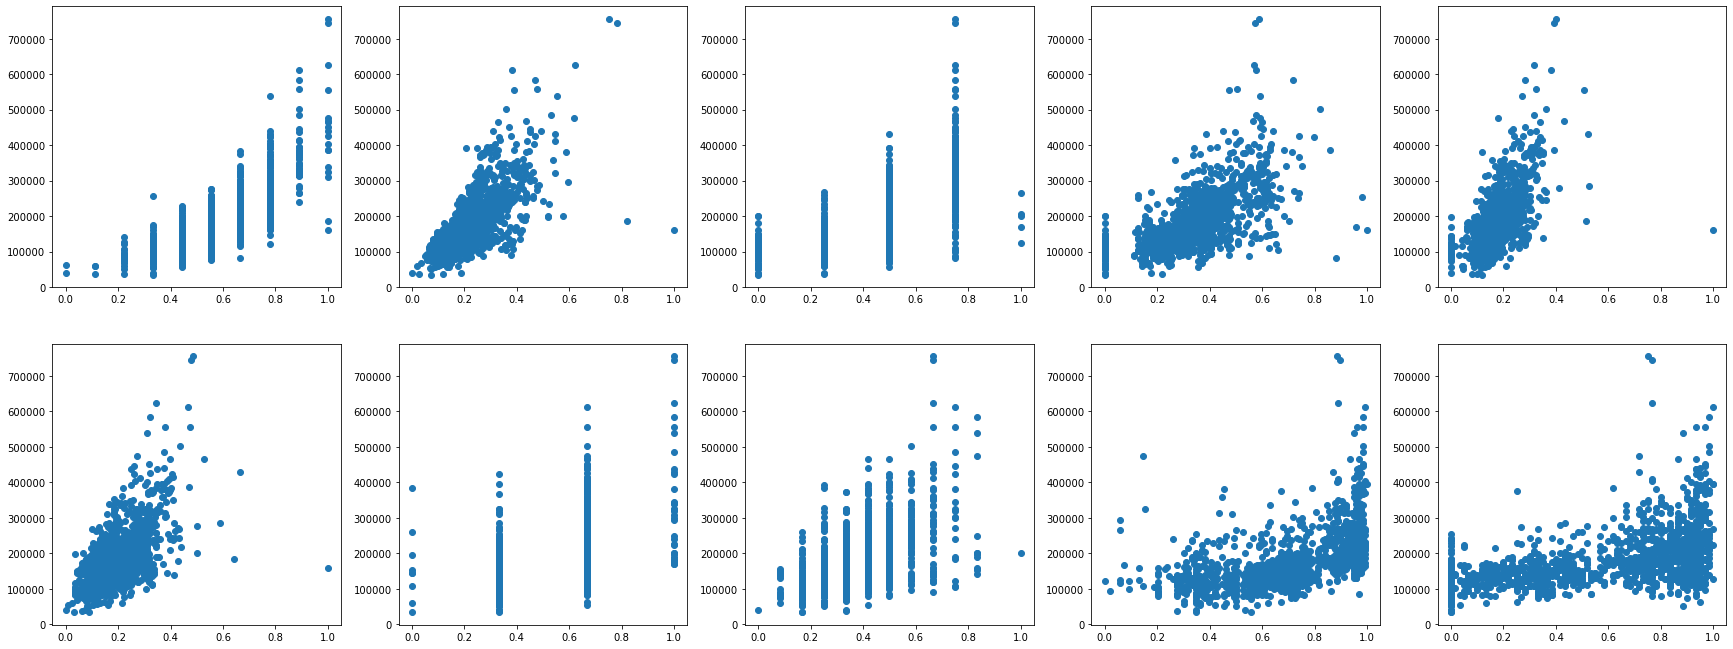

In [16]:
fig = plt.figure(figsize=(30,30))

for i,key in enumerate(X.keys()):
    ax = plt.subplot(5,5,i+1)
    ax.scatter(X[key],y)

By end of the feature selection, Our feature set contains above features and related records.

### Begin Training
By now we get to know that the problem statement belongs to a Regression problem that maps a set of features to a continuous variable know 'SalePrice'.
#### Model1: Linear Regression
Our first model for training is well-known used solely for Regression problems, the Linear Regression.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

##### Split Training Set and Predict: without adding new features

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=4)
regressor = LinearRegression().fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

##### Evaluating Model : without adding new features

In [19]:
print("R-square: ", r2_score(y_test, y_pred))
print("Root Mean squared error: ", mean_squared_error(y_test, y_pred)**0.5)

R-square:  0.8375928390939177
Root Mean squared error:  29774.478137535007


##### Split Training Set and Predict: adding the 5 newly created features

In [20]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([X,new_features],axis=1), y, test_size=0.15, random_state=4)
regressor = LinearRegression().fit(X_train, y_train) 
y_pred = regressor.predict(X_test)

##### Evaluating Model : without adding new features

In [21]:
print("R-square: ", r2_score(y_test, y_pred))
print("Root Mean squared error: ", mean_squared_error(y_test, y_pred)**0.5)

R-square:  0.836158572078144
Root Mean squared error:  29905.66287559976


##### Visualizing Model

<AxesSubplot:>

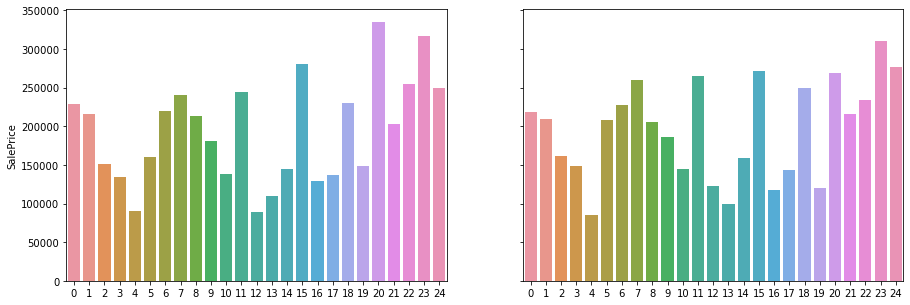

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=ax[0],x=np.arange(25), y=y_test[:25])
sns.barplot(ax=ax[1],x=np.arange(25), y=y_pred[:25])

We have achieved a great improvement using our first model. Now shift our focus on solving this problem using other algorithms.

#### Model2: K-nearest Neighbor Regressor
Our next algorithm which we introduce is K-nearest Neighbor

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(pd.concat([X,new_features], axis=1), y, test_size=0.10, random_state=7)
knn_models = []
for i in range(0,9):
    knn = KNeighborsRegressor(n_neighbors = i+1)
    knn_models += [knn.fit(X_train, y_train)]
    y_pred=knn.predict(X_test)
    print(f"K={i+1}")
    print(f"  R-square: {r2_score(y_test, y_pred)}")
    print(f"  Root Mean squared error: {mean_squared_error(y_test, y_pred)**0.5}")

K=1
  R-square: 0.7149868926604548
  Root Mean squared error: 43997.96192890371
K=2
  R-square: 0.7376320596151789
  Root Mean squared error: 42213.90477074054
K=3
  R-square: 0.7912368592011353
  Root Mean squared error: 37655.38168802404
K=4
  R-square: 0.7935766039063337
  Root Mean squared error: 37443.77289442026
K=5
  R-square: 0.8186394760373423
  Root Mean squared error: 35097.123506955184
K=6
  R-square: 0.824603965515031
  Root Mean squared error: 34515.17090457902
K=7
  R-square: 0.8191006582045655
  Root Mean squared error: 35052.47081684755
K=8
  R-square: 0.8171443160211742
  Root Mean squared error: 35241.49920614114
K=9
  R-square: 0.8195725010324859
  Root Mean squared error: 35006.726991065705


##### Visualization of the Result: KNN score with varying number of neighbor

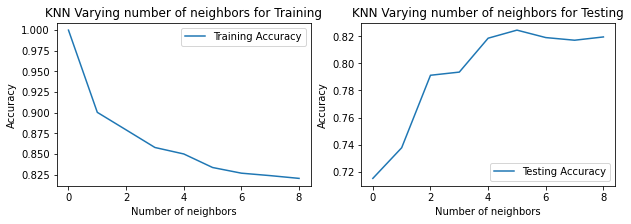

In [24]:
fig = plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
plt.plot(np.arange(0,9), [
    knn_models[i].score(X_train, y_train) 
    for i in np.arange(0,9)
], label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors for Training')
plt.subplot(1,2,2)
plt.plot(np.arange(0,9), [
    knn_models[i].score(X_test, y_test) 
    for i in np.arange(0,9)
], label='Testing Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Varying number of neighbors for Testing')
plt.show()

##### Highest K value test-score: Our Best Choice
- Hence using our highest K value wil yeild following result: 

In [25]:
knn = KNeighborsRegressor(n_neighbors = 7)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

- We are getting the following accuracy score for training.

In [26]:
knn.score(X_train, y_train)

0.8268011396344501

- We are getting the following accuracy score for testing.

In [27]:
print(f"  R-square: {r2_score(y_test, y_pred)}")
print(f"  Root Mean squared error: {mean_squared_error(y_test, y_pred)**0.5}")

  R-square: 0.8191006582045655
  Root Mean squared error: 35052.47081684755


#### Model3: Using Decision Tree Regressor model

##### Feature Importance using Desicision Tree Regression
- We start the process of selecting the important features using feature importance. 
- from which we choose top 10 features that are important to determine our target value.

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X,y = dataset.iloc[:,:-1].apply(
    lambda col: le.fit_transform(col) if col.dtype != 'float64' else col
), dataset.iloc[:,-1]


- From entire set of features in dataset we fit the entire training dataset with no reduction.

In [1]:
etree = DecisionTreeRegressor().fit(X, y)
top10_features = pd.DataFrame(etree.feature_importances_, index=X.keys()).sort_values(ascending=False, by=0)
top10_features.head(10)

NameError: name 'DecisionTreeRegressor' is not defined

- Then we train the model using Decision Tree algorithm.

In [30]:
X = X[(top10_features[0][:10]).keys()]
X.head()

,OverallQual,GrLivArea,2ndFlrSF,TotalBsmtSF,1stFlrSF,BsmtFinSF1,Neighborhood,GarageCars,GarageArea,CentralAir
0,6,531,232,179,134,361,5,2,220,1
1,5,259,0,441,427,482,24,2,149,1
2,6,570,239,214,178,222,5,2,260,1
3,6,536,180,117,208,66,6,3,284,1
4,7,734,320,370,347,328,15,3,380,1


In [31]:
X_train, X_test, y_train, y_test = train_test_split(pd.concat([X,new_features],axis=1), y, test_size=0.15, random_state=np.random.randint(0,2))
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

##### Accuracy

In [32]:
print(f"  R-square: {r2_score(y_test, y_pred)}")
print(f"  Root Mean squared error: {mean_squared_error(y_test, y_pred)**0.5}")

  R-square: 0.8096732859335342
  Root Mean squared error: 34201.32814478964


<AxesSubplot:>

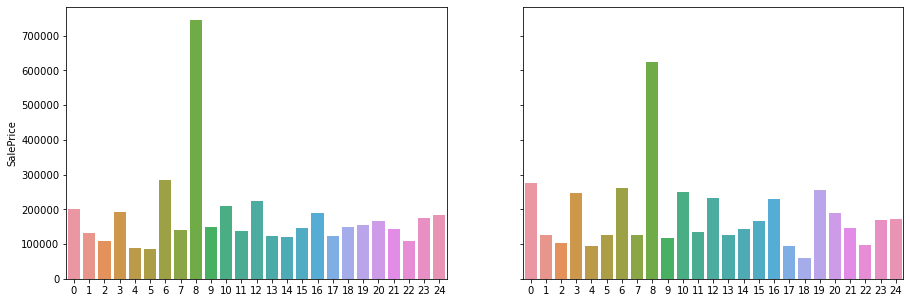

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
sns.barplot(ax=ax[0],x=np.arange(25), y=y_test[:25])
sns.barplot(ax=ax[1],x=np.arange(25), y=y_pred[:25])

 Hence, we have achieved our goal of training a model to solve House prediction by using 3 most popular ML alogrithms.
 
 <hr/>

<h2 style='text-align: center'>The End</h2>